# Alternative Data in Assessing Creditworthiness

## 1. Introduction
### 1.1. Background
Financial institutions predominantly use credit scores and other conventional methods of assessing customer creditworthiness when making mortgage loan application decisions. Credit score reporting agencies calculate credit scores using a weighted mix of a person's timely payment history, balance of debt owed relative to their total lines of credit, length of credit history and other measures.    

For 'thin file' and unscorable customers with a short or even non-existant credit histroy, such lending practices leave them 'unbanked' and without access to credit. It is estimated that millions of US households fall into this 'unbanked' category, comprised of millenials, the elderly and ethnic minority groups.  
  
Banks, households and society as a whole stand to benefit from extending mortgage loans to such otherwise eligable households. In recent years, many innovative fintech firms have leveraged the vast amounts of data available on customers and households by applying behavioral analytics to develop alternative methods of assessing creditworthiness for lending decisions. For example, the Entreprenuerial Finance Lab (EFL) has developed an algorithm that predicts creditworthiness based on personality traits, and a research institue in Germany found predictive patterns of creditworthiness in customers' digital footprints collected from an e-commerce platform.  

### 1.2. Research Question
The premise of this study builds on such alternative credit risk assessments and attempts to answer the question: can attitudes, specifically beliefs about borrowing, financial planning, investing and financial institutions in general, predict defaults on mortgage payments? 

### 1.3. Data Overview
The dataset consists of survey responses from 4,374 US households measuring consumer needs, attitides and behaviors in various domains of finance, e.g. consumer and real estate credit, investment, retirement saving and insurance. The survey is part of an initiative started in 1978 by the Consumer Financial Decisions division of Strategic Business Insights (SBI), an international consumer research and consulting firm based in Silicon Valley. 

## 2. Data Cleaning and Exploration

In [1]:
# IMPORT PACKAGES
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import sklearn as sk
from sklearn import ensemble
from sklearn import tree
from sklearn.utils.fixes import signature
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from sklearn.metrics import (accuracy_score, confusion_matrix, make_scorer, recall_score, roc_curve, auc, 
                             f1_score, average_precision_score, precision_recall_curve, adjusted_mutual_info_score, 
                             mutual_info_score, precision_score)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import (GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier,
                              BaggingClassifier)
from sklearn.feature_selection import f_classif
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.pipeline import Pipeline
from collections import Counter
from scipy import io
import warnings
warnings.filterwarnings('ignore')

### 2.1. Data Cleaning

In [2]:
# READ CVS
data_raw = pd.read_csv('sbi_full.csv')

# GET DATASET INFO
print(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4374 entries, 0 to 4373
Columns: 3762 entries, ID to ASSET19B
dtypes: float64(3688), int64(73), object(1)
memory usage: 125.5+ MB
None


#### Select Demographic, Attitudinal, and Target Variables
While the dataset contains 3,762 features spanning household needs, attitudes and behaviors, this study's narrow scope allows us to focus our analysis on attitudinal features, controlling for demographic variables. As such, we can subset the relevent features.

In [3]:
# SLICE DEMOGRAPHIC, ATTITUDINAL AND TARGET FEATURES
data = data_raw.loc[:, ['A6', 'A7_A_1', 'A7_A_2', 'A8B', 'O20', 'STATE', 'SOC_ECON', 'OCALC_1', 'OCALC_2', 'OCALC_3',
                        'LIFESTAG', 'G6A_A', 'G6A_B', 'G6A_C', 'A9_1','B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6',
                        'B2_7', 'B2_8', 'B2_9', 'B2_10', 'B2_11', 'B2_12', 'B2_13', 'B2_14', 'B2_15', 'B2_16', 'B2_17',
                        'B2_18', 'B2_19', 'B2_20', 'B2_21', 'B2_22', 'B3_1', 'B3_2', 'B3_3', 'C3_1', 'C3_2', 'C3_3', 
                        'C3_4', 'C3_5', 'C3_6', 'C3_7', 'C3_8', 'C3_9', 'C3_10', 'C3_11', 'C3_12', 'C3_13', 'C3_14', 
                        'C3_15', 'C4_1', 'C4_2', 'C4_3', 'C4_4', 'C4_5', 'C4_6', 'C4_7', 'C4_8', 'E5_1', 'E5_2', 'E5_3',
                        'E5_4', 'E5_5', 'E5_6', 'E5_7','E5_8', 'E5_9', 'E5_10', 'E5_11', 'E5_12', 'E5_13', 'E5_14', 
                        'E5_15', 'E5_16', 'E5_17', 'E5_18', 'E5_19', 'E5_20', 'E5_21', 'E5_22', 'E5_23', 'E5_24', 
                        'E5_25', 'J2_1', 'J2_2', 'J2_3', 'J2_4', 'J2_5', 'J2_6', 'J2_7', 'J2_8', 'J2_9', 'J2_10', 
                        'J2_11', 'J2_12', 'J2_13', 'J2_14', 'J2_15', 'J2_16', 'G25_A_12']].copy()

# RENAME FEATURES
data.columns = ['ADULTS', 'GENDER1', 'GENDER2', 'MARITALSTAT', 'RESPOND', 'STATE', 'SOC_ECON', 'AGE1', 'AGE2', 'EDUC',
                'LIFESTAG', 'MORTGAGE1', 'MORTGAGE2', 'MORTGAGE3', 'HANDLE', 'FIN1', 'FIN2', 'FIN3', 'FIN4', 'FIN5', 
                'FIN6', 'FIN7', 'FIN8', 'FIN9', 'FIN10', 'FIN11', 'FIN12', 'FIN13', 'FIN14', 'FIN15', 'FIN16', 'FIN17',
                'FIN18', 'FIN19', 'FIN20','FIN21', 'FIN22', 'FIN23', 'FIN24', 'FIN25', 'INS1', 'INS2', 'INS3', 'INS4',
                'INS5', 'INS6', 'INS7', 'INS8', 'INS9', 'INS10', 'INS11', 'INS12', 'INS13', 'INS14', 'INS15', 'TRUST1',
                'TRUST2','TRUST3', 'TRUST4', 'TRUST5', 'TRUST6', 'TRUST7', 'TRUST8', 'INV1', 'INV2', 'INV3', 'INV4', 
                'INV5','INV6', 'INV7','INV8', 'INV9', 'INV10', 'INV11', 'INV12', 'INV13', 'INV14', 'INV15', 'INV16', 
                'INV17', 'INV18', 'INV19', 'INV20', 'INV21', 'INV22', 'INV23', 'INV24', 'INV25', 'BOR1', 'BOR2', 'BOR3',
                'BOR4', 'BOR5', 'BOR6', 'BOR7', 'BOR8', 'BOR9', 'BOR10', 'BOR11', 'BOR12', 'BOR13', 'BOR14', 'BOR15', 
                'BOR16', 'DEFAULT']

# DISPLAY DATAFRAME
print('Dataframe shape', data.shape)
display(data.head())

Dataframe shape (4374, 105)


,ADULTS,GENDER1,GENDER2,MARITALSTAT,RESPOND,STATE,SOC_ECON,AGE1,AGE2,EDUC,LIFESTAG,MORTGAGE1,MORTGAGE2,MORTGAGE3,HANDLE,FIN1,FIN2,FIN3,FIN4,FIN5,FIN6,FIN7,FIN8,FIN9,FIN10,FIN11,FIN12,FIN13,FIN14,FIN15,FIN16,FIN17,FIN18,FIN19,FIN20,FIN21,FIN22,FIN23,FIN24,FIN25,INS1,INS2,INS3,INS4,INS5,INS6,INS7,INS8,INS9,INS10,INS11,INS12,INS13,INS14,INS15,TRUST1,TRUST2,TRUST3,TRUST4,TRUST5,TRUST6,TRUST7,TRUST8,INV1,INV2,INV3,INV4,INV5,INV6,INV7,INV8,INV9,INV10,INV11,INV12,INV13,INV14,INV15,INV16,INV17,INV18,INV19,INV20,INV21,INV22,INV23,INV24,INV25,BOR1,BOR2,BOR3,BOR4,BOR5,BOR6,BOR7,BOR8,BOR9,BOR10,BOR11,BOR12,BOR13,BOR14,BOR15,BOR16,DEFAULT
0,1,NaN,2.0,1.0,2.0,IL,3,30.0,NaN,4.0,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,1.0,3.0,1.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,2.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,1.0,1.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,3.0,2.0,3.0,1.0,3.0,2.0
1,1,NaN,2.0,2.0,2.0,AZ,2,52.0,NaN,5.0,3,1.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,4.0,4.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,4.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,3.0,1.0,1.0,3.0,2.0,1.0,4.0,1.0,2.0,4.0,4.0,4.0,1.0,4.0,2.0
2,1,NaN,2.0,2.0,2.0,CA,4,35.0,NaN,7.0,1,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,3.0,4.0,4.0,1.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,4.0,2.0,4.0,4.0,3.0,3.0,2.0,1.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,3.0,1.0,4.0,2.0,1.0,3.0,2.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,4.0,2.0,2.0,4.0,2.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,3.0,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,4.0,2.0
3,1,NaN,2.0,4.0,2.0,LA,4,79.0,NaN,3.0,8,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,1.0,3.0,3.0,1.0,2.0,2.0,2.0,3.0,4.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,4.0,4.0,2.0,3.0,4.0,3.0,4.0,4.0,NaN,2.0,4.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,1.0,3.0,3.0,2.0,4.0,3.0,3.0,2.0,3.0,1.0,4.0,2.0,2.0,3.0,2.0,4.0,1.0,4.0,3.0,1.0,3.0,4.0,1.0,4.0,1.0,2.0,4.0,4.0,4.0,1.0,4.0,2.0
4,2,1.0,2.0,5.0,1.0,MI,4,64.0,66.0,3.0,6,1.0,2.0,1.0,2.0,3.0,1.0,2.0,3.0,2.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,1.0,3.0,2.0,2.0,3.0,3.0,4.0,4.0,1.0,1.0,1.0,2.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0,2.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,1.0,2.0,3.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0


#### Descriptive Statistics
A first step in our analysis is to undertand the features, i.e. their data types, as well as the spread of their values.

In [4]:
# EXPLORE DATATYPES
print(data.dtypes)

ADULTS           int64
GENDER1        float64
GENDER2        float64
MARITALSTAT    float64
RESPOND        float64
STATE           object
SOC_ECON         int64
AGE1           float64
AGE2           float64
EDUC           float64
LIFESTAG         int64
MORTGAGE1      float64
MORTGAGE2      float64
MORTGAGE3      float64
HANDLE         float64
FIN1           float64
FIN2           float64
FIN3           float64
FIN4           float64
FIN5           float64
FIN6           float64
FIN7           float64
FIN8           float64
FIN9           float64
FIN10          float64
FIN11          float64
FIN12          float64
FIN13          float64
FIN14          float64
FIN15          float64
FIN16          float64
FIN17          float64
FIN18          float64
FIN19          float64
FIN20          float64
FIN21          float64
FIN22          float64
FIN23          float64
FIN24          float64
FIN25          float64
INS1           float64
INS2           float64
INS3           float64
INS4       

In [5]:
# DESCRIPTIVE STATISTICS
print(data.describe(include='all'))

             ADULTS      GENDER1      GENDER2  MARITALSTAT      RESPOND STATE  \
count   4374.000000  3380.000000  3746.000000  4242.000000  4364.000000  4374   
unique          NaN          NaN          NaN          NaN          NaN    51   
top             NaN          NaN          NaN          NaN          NaN    CA   
freq            NaN          NaN          NaN          NaN          NaN   560   
mean       1.629172     1.020710     1.980779     4.055163     1.789413   NaN   
std        0.483082     0.142433     0.137318     1.657199     0.730067   NaN   
min        1.000000     1.000000     1.000000     1.000000     1.000000   NaN   
25%        1.000000     1.000000     2.000000     2.000000     1.000000   NaN   
50%        2.000000     1.000000     2.000000     5.000000     2.000000   NaN   
75%        2.000000     1.000000     2.000000     5.000000     2.000000   NaN   
max        2.000000     2.000000     2.000000     7.000000     4.000000   NaN   

           SOC_ECON        

##### Findings:
- All attitudinal features are coded as integers ranging from 1 to 4, corresponding with 'mostly agree', 'agree', 'diagree', 'mostly diasgree'. Typically, categorical variables that are ordinal should be label-encoded. Since they are already of type integer, no further processing is required.

- The target variable, DEFAULT, is a binary variable of value 1 or 2 and type integer. For the purpose of our analysis, we will code defaulting on a payment as a positive event, value 1, and not defaulting on a payment as a non-event, value 0. The target variable will need to be transformed accordingly.

- GENDER1, GENDER2, AGE1 and AGE2 correspond to the sex and age of each 'head of household' for households with 2 heads of household. These features will need to be transformed and consolidated under the assumption that the primary head of household is the person who responded to the survey. Once consolidated, the sex should be one-hot encoded.

- MARITALSTAT, EDUC and LIFESTAG, are nominal categorical variables for marital status, education and lifestage. They are currently coded as integers and will have to be one-hot encoded.  

- SOCECON is a categorical variable for socioeconomic status that is coded as integer. Similarly to attitudinal features, socioeconomic status is an ordinal variable that should be label encoded. Since they are already of type integer, no further processing is required. 

- Finally, MORTGAGE1, MORTGAGE2 and MORTGAGE3 are categorical variables indicating whether households have any one of 3 types of mortgage loans. These variables would need to be transformed and consolidated into one feature.  

#### Data Transformation and Feature Engineering
##### Age and Gender

In [6]:
display(data[['ADULTS', 'RESPOND', 'GENDER1', 'GENDER2', 'AGE1', 'AGE2']].head())

,ADULTS,RESPOND,GENDER1,GENDER2,AGE1,AGE2
0,1,2.0,NaN,2.0,30.0,NaN
1,1,2.0,NaN,2.0,52.0,NaN
2,1,2.0,NaN,2.0,35.0,NaN
3,1,2.0,NaN,2.0,79.0,NaN
4,2,1.0,1.0,2.0,64.0,66.0


In [7]:
# TRANSFORM AGE AND GENDER
sex = []
age = []

for i in data.index:
    adults = data.loc[i, 'ADULTS']
    if adults == 2:
        responsibility = data.loc[i, 'RESPOND']
        if responsibility == 1:
            if data.loc[i, 'GENDER1']==1:
                sex.append('MALE')
                age.append(data.loc[i, 'AGE2'])
            else:
                sex.append('FEMALE')
                age.append(data.loc[i, 'AGE1'])
        elif responsibility == 2:
            if data.loc[i, 'GENDER2']==2:
                sex.append('FEMALE')
                age.append(data.loc[i, 'AGE1'])
            else:
                sex.append('MALE')
                age.append(data.loc[i, 'AGE2'])            
        elif responsibility == 3:
            sex.append('MALE')
            age.append(data.loc[i, 'AGE2'])
        else:
            sex.append(np.nan)
            age.append(np.nan)
    else:
        if data.loc[i, 'GENDER1']==1:
            sex.append('MALE')
            age.append(data.loc[i, 'AGE2'])
        elif data.loc[i, 'GENDER2']==2:
            sex.append('FEMALE')
            age.append(data.loc[i, 'AGE1'])
        else:
            sex.append(np.nan)
            age.append(np.nan)
    
# ADD TRANSFORMED VARIABLES TO DATAFRAME 
data['SEX'] = sex
data['AGE'] = age

# DROP ORIGINAL VARIABLES
data.drop(['AGE1', 'AGE2', 'GENDER1', 'GENDER2', 'RESPOND'], axis=1, inplace=True)

print('Dataframe shape', data.shape)
display(data[['ADULTS', 'AGE', 'SEX']].head())

Dataframe shape (4374, 102)


,ADULTS,AGE,SEX
0,1,30.0,FEMALE
1,1,52.0,FEMALE
2,1,35.0,FEMALE
3,1,79.0,FEMALE
4,2,66.0,MALE


##### Mortgage

In [8]:
# TRANSFORM MORTGAGE FEATURES
mortgage = []

for i in data.index:
    if data.loc[i, 'MORTGAGE1']==1:
        mortgage.append(1)
    elif data.loc[i, 'MORTGAGE2']==1:
        mortgage.append(1)
    elif data.loc[i, 'MORTGAGE3']==1:
        mortgage.append(1)
    else:
        mortgage.append(0)

# ADD TRANSFORMED VARIABLE TO DATAFRAME
data['MORTGAGE'] = mortgage

# DROP ORIGINAL VARIABLES
data.drop(['MORTGAGE1', 'MORTGAGE2', 'MORTGAGE3'], axis=1, inplace=True)

# GET INFO
print('Dataframe shape', data.shape)

Dataframe shape (4374, 100)


##### Marital Status, Education and Lifestage

In [9]:
# TRANSFROM NOMINAL DEMOGRAPHIC VARIABLES FOR ONE-HOT ENCODING 
data[['MARITALSTAT', 'EDUC', 'LIFESTAG']] = data[['MARITALSTAT', 'EDUC', 'LIFESTAG']].astype('category')
print(data[['MARITALSTAT', 'EDUC', 'LIFESTAG']].dtypes)

MARITALSTAT    category
EDUC           category
LIFESTAG       category
dtype: object


##### Default

In [10]:
# TRANSFORM TARGET VARIABLE
data.loc[data['DEFAULT']==2,'DEFAULT'] = 0

#GET INFO
print('Dataframe shape', data.shape)
print(data['DEFAULT'].unique())

Dataframe shape (4374, 100)
[ 0.  1. nan]


##### Subset Households with Mortgage Loans

In [11]:
# SELECT HOUSEHOLDS WITH A MORTGAGE LOAN
mortgage = data[(data['MORTGAGE']==1)].copy()
mortgage.reset_index(drop=True, inplace=True)
print(mortgage.shape)

(2389, 100)


#### Missing Data

The srategy for dealing with missing data will be as follows:
- Target: remove all rows with missing data. 
- Features: replace missing data with the mode of each variable

In [12]:
# EXPLORE MISSING DATA
print(mortgage.isna().sum())

ADULTS          0
MARITALSTAT    74
STATE           0
SOC_ECON        0
EDUC            6
LIFESTAG        0
HANDLE          9
FIN1            7
FIN2           16
FIN3            7
FIN4            7
FIN5           10
FIN6           14
FIN7           11
FIN8            8
FIN9           15
FIN10          21
FIN11          21
FIN12          13
FIN13          16
FIN14          13
FIN15          20
FIN16          23
FIN17          14
FIN18          18
FIN19          27
FIN20          17
FIN21          11
FIN22          12
FIN23           8
FIN24          10
FIN25          17
INS1           30
INS2           37
INS3           37
INS4           37
INS5           34
INS6           35
INS7           42
INS8           40
INS9           38
INS10          43
INS11          35
INS12          34
INS13          38
INS14          39
INS15          47
TRUST1         10
TRUST2         19
TRUST3         22
TRUST4         18
TRUST5         23
TRUST6         14
TRUST7         16
TRUST8         22
INV1      

In [13]:
# DROP MISSING DATA IN TARGET VARIABLE
mortgage = mortgage.dropna(subset=['DEFAULT'], axis = 0)

In [14]:
# REPLACE MISSING DATA IN FEATURES WITH MODE
for column in mortgage.columns:
    mortgage[column].fillna(mortgage[column].mode()[0], inplace=True)
    
print('Dataframe shape', mortgage.shape)

Dataframe shape (2341, 100)


In [15]:
# THE DEFAUT RATE/BASE RATE 
print(f"Default rate: {len(mortgage[mortgage.DEFAULT==1])/len(mortgage):.2%}")

Default rate: 5.89%


### 2.2. Data Exploration

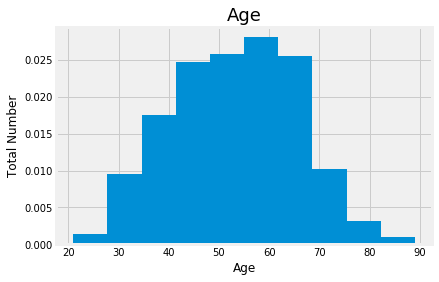

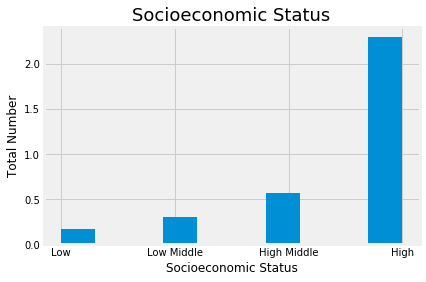

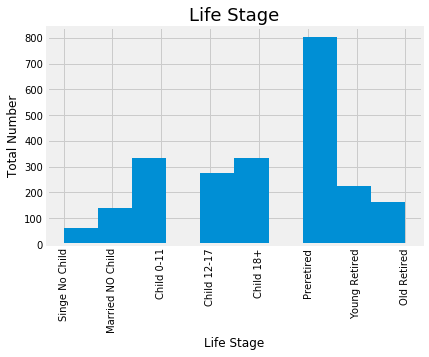

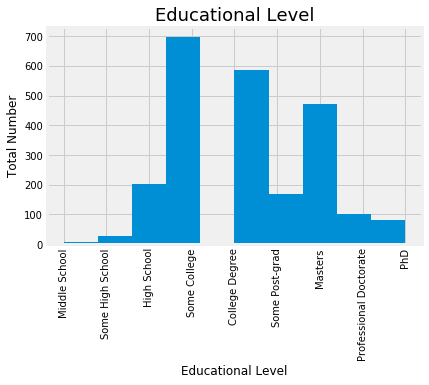

In [16]:
# PLOT GRAPHS
# Age
age = plt.figure()
plt.hist(mortgage.AGE, density=1)
plt.xlabel('Age', size=12)
plt.ylabel('Total Number', size=12)
plt.title('Age',size=18)
plt.show()
age.savefig('Age')

# Socioeconomic status
soc_econ = plt.figure()
plt.hist(mortgage.SOC_ECON, align='mid', density=1)
plt.xlabel('Socioeconomic Status', size=12)
plt.xticks(np.arange(1, 5 , step=1), ('Low', 'Low Middle', 'High Middle', 'High'))
plt.ylabel('Total Number', size=12)
plt.title('Socioeconomic Status',size=18)
plt.show()
soc_econ.savefig('soc econ')

# Life stage
life_stag = plt.figure()
plt.hist(mortgage.LIFESTAG)
plt.xlabel('Life Stage', size=12)
plt.xticks(np.arange(1, 9 , step=1), ('Singe No Child', 'Married NO Child', 'Child 0-11', 'Child 12-17', 'Child 18+', 
                                      'Preretired', 'Young Retired','Old Retired'),
          rotation='90')
plt.ylabel('Total Number', size=12)
plt.title('Life Stage',size=18)
plt.show()
life_stag.savefig('life stage')

# Education
life_stag = plt.figure()
plt.hist(mortgage.EDUC)
plt.xlabel('Educational Level', size=12)
plt.xticks(np.arange(1, 10 , step=1), ('Middle School', 'Some High School', 'High School', 'Some College', 
                                       'College Degree', 'Some Post-grad', 'Masters', 'Professional Doctorate',
                                      'PhD'),
          rotation='90')
plt.ylabel('Total Number', size=12)
plt.title('Educational Level',size=18)
plt.show()
life_stag.savefig('Education')

### 2.3 Data Preprocessing

In order to test incremental predictive ability of demographic and attitudinal features, 3 sets of models will be evaluated:
1. Models with only demographic features
2. Models with only attitudinal features
3. Models with demographic and attitudinal features

In [17]:
# SEPERATE DEMOGRAPHIC AND ATTITUDINAL FEATURES 

# Demographic features
X_demog = mortgage[['ADULTS', 'MARITALSTAT', 'EDUC', 'STATE', 'SOC_ECON', 'LIFESTAG', 'SEX', 'AGE']].copy()
# One-hot encode nominal categorical variables
X_demog = pd.get_dummies(X_demog, drop_first=True)
print('Demographics Dataframe shape:', X_demog.shape)

# Attitudinal features
X_attitudes = mortgage[['FIN1', 'FIN2', 'FIN3', 'FIN4', 'FIN5', 'FIN6', 'FIN7', 'FIN8', 'FIN9', 'FIN10', 'FIN11', 
                        'FIN12', 'FIN13', 'FIN14', 'FIN15', 'FIN16', 'FIN17', 'FIN18', 'FIN19', 'FIN20', 'FIN21', 
                        'FIN22', 'FIN23', 'FIN24', 'FIN25', 'INS1', 'INS2', 'INS3', 'INS4', 'INS5', 'INS6', 'INS7', 
                        'INS8', 'INS9', 'INS10', 'INS11', 'INS12', 'INS13', 'INS14', 'INS15', 'TRUST1', 'TRUST2', 
                        'TRUST3', 'TRUST4', 'TRUST5', 'TRUST6', 'TRUST7', 'TRUST8', 'INV1', 'INV2', 'INV3', 'INV4', 
                        'INV5', 'INV6', 'INV7', 'INV8', 'INV9', 'INV10', 'INV11', 'INV12', 'INV13', 'INV14', 'INV15', 
                        'INV16', 'INV17', 'INV18', 'INV19', 'INV20', 'INV21', 'INV22', 'INV23', 'INV24', 'INV25', 
                        'BOR1', 'BOR2', 'BOR3', 'BOR4', 'BOR5', 'BOR6', 'BOR7', 'BOR8', 'BOR9', 'BOR10', 'BOR11', 
                        'BOR12', 'BOR13', 'BOR14', 'BOR15', 'BOR16']].copy()
print('Attitides Dataframe shape:', X_attitudes.shape)

# Full features
X = pd.concat([X_demog, X_attitudes], axis=1, sort=True)
print('Full Dataframe shape:', X.shape)

# SEPERATE TARGET 
y = mortgage['DEFAULT']
print('Target shape:', y.shape)


Demographics Dataframe shape: (2341, 75)
Attitides Dataframe shape: (2341, 89)
Full Dataframe shape: (2341, 164)
Target shape: (2341,)


### 2.4. Feature Selection

##### Mutual Information
When assessing categorical variables, the adjusted mutual information score is one method by which we can perform univariate feature selection. The adjusted mutual information score measures how much information is shared between the feature and the target, specifically the degree to which information about a feature contributes to the correct classification of a target variable, adjusting for the number of clusters within a feature and within the target. Given the relatively low dimensionality of the data, we use the mutual information score more as a guideline and beanchmark for evaluating the features our models find important. 

The 20 most related features:


,Features,Adjusted Mutual Info Score
0,BOR13,0.035166
1,FIN4,0.025095
2,BOR1,0.021549
3,FIN14,0.019461
4,INV12,0.016318
5,BOR7,0.014646
6,FIN3,0.014513
7,FIN11,0.011198
8,BOR9,0.011128
9,LIFESTAG_8,0.010732


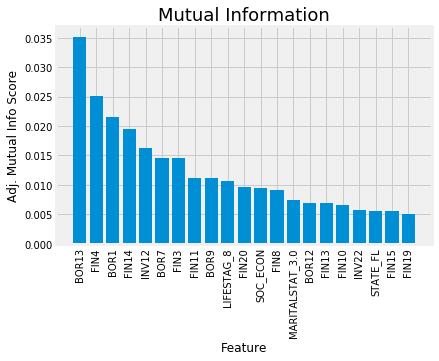

In [18]:
# ADJUSTED MUTUAL INFORMATION SCORE
mutual_info_score = []
features = X.columns

for feature in features:
    mutual_info = adjusted_mutual_info_score(X[feature], y)
    mutual_info_score.append(mutual_info)

mutual_info_tuples = list(zip(features, mutual_info_score))
mutual_info = pd.DataFrame(mutual_info_tuples, columns=['Features','Adjusted Mutual Info Score'])
mutual_info.sort_values(by=['Adjusted Mutual Info Score'], ascending=False, inplace=True)
mutual_info.reset_index(drop=True, inplace=True)

print('The 20 most related features:')
display(mutual_info.head(21))

plt.figure()
plt.bar(mutual_info.Features.head(21), mutual_info['Adjusted Mutual Info Score'].head(21))
plt.xlabel('Feature', size=12)
plt.ylabel('Adj. Mutual Info Score', size=12)
plt.title('Mutual Information',size=18)
plt.xticks(rotation=90)
plt.show()

## 3. Model Evaluation Metrics

Defaults on mortgage payments tend to be rare in comparison to cases where people make their mortgage pamyments on time. In our sample, only 6% of households have defaulted on a mortgage payment and the remaining 94% have not. This results in highly skewed data and class imbalance within our target variable. 

The commonly used accuracy score, or the misclassification score, becomes less informative and perhaps a biased measure of model performance in the case of highly imbalanced classes. Given our dataset, it is possible for our models to have deceptively high accuracy scores of around 94% (100% minus the base rate of the minorty class, i.e. 'default', at 6%) simply by classifying every household to the majority class, i.e. 'no defaut'. Alternative measures of model perofmance must be used. 

Our research question asks whether we can correctly identify households who will default on their mortgage loan payments. In this situation, the minorty class is the positive event of 'default', given a value of 1, and the majority class of 'no default', given a value of 0. Further, we make the argument that the cost of a false negative -  approving a household for a loan when they will default - is higher than the the cost of a false posiitve - rejecting a household for a loan when they will not default. The devastating impact of a subprime mortgage buble on the global economy has been evidenced in the 2008 financial crisis.  As such, we will evaluate our models on the following criteria:
1. Consusion Matrix: A confusion matrix exposes the model's misclassification masked by a high accuracy score in the case of imbalanced classes. 
2. ROC-AUC: The area under the Receiver-Operating Curve captures the trade-off between the true positive rate and false positive rate under different confidence thresholds. 
3. Recall: In most cases, there exhists a tradeoff between recall and precision. While the F1 score would balance this tradeoff between recall and precision, given that we are more concerned with correctly identifying all households who will default in a given sample of mortgage applicants, we will aim to optimize recall at the expense of precision. 

### Confusion Matrix

In [19]:
# CONFUSION MATRIX
def ConfusionMatrix(model, X, Y):
    #confusion matrix
    y_hat = model.predict(X)
    plt.figure(figsize=(4.5, 4.5))
    sns.heatmap(confusion_matrix(Y, y_hat), square=True, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    return plt.show()

### ROC-AUC and Recall

In [20]:
# RECIEVER OPERATER CURVE - AREA UNDER THE CURVE
def RocAuc(model, X, Y):
    #ROC Curve
    #Get the probability for each point in the train set.
    probs = model.predict_proba(X)
    y_hat = model.predict(X)

    # Compute ROC curve and AUC for for the 1 class
    fpr, tpr, _ = roc_curve(Y, probs[:, 1])
    roc_auc = auc(fpr, tpr)
  
    # Plot the ROC curve
    plt.figure(figsize=(4, 4))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC and AUC')
    plt.legend(loc="best")
    plt.show()
    
    return (plt.show(), print(f"AUC score: {(roc_auc):.3}"), print(f"Recall score: {(recall_score(Y, y_hat)):.3}"))

## 4. Models and Algorithms
The model building, fitting and tuning process:
1. Perform a train/test split
2. Scale the features
3. Run a grid search with cross-vilidation, oversampling the minority class (Default=1) in the train set using Synthetic Minority Oversampling Technique (SMOTE). Oversampling was not performed on the validation and test sets
5. Evalutate the best model on evaluation metrics outlined above. 

Algorithms used:
1. Logistic regression: used as a benchmark against which to assess the performance of decision tree based models
2. Decision tree: used as a benchmark to assess the performance of decision tree based ensemble models
3. Random forest: used to prevent overfitting as each tree in the ensemble is overfit to the sub-sample of the cases and features it randomly recieves and the final classification is done by voting, theoretically erasing the effect of overfitting through diversification. 
4. Gradient boosted decision trees: while in a random forest each sub-tree is trained in isolation and in parallel of the other trees in the forest, gradient boosted decision trees work sequentially, each one learning from the mistake of its predecesssor, using gradient decent to minimize the cost-function.  

### 4.1. Demographic Features

In [67]:
# SPLIT OUT A TRAIN AND TEST SET
X_train, X_test, y_train, y_test  = train_test_split(X_demog, y, train_size = 0.7, stratify=y)

# CHANGE Y TO A 1-D ARRAY
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

# SCALE THE DATA
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# GET INFO
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1638, 75)
(1638,)
(703, 75)
(703,)


#### Logistic Regression

In [68]:
# AUTOMATIC HYPER-PARAMETER OPTIMIZATION WITH CROSS VALIDATION 
model = Pipeline([
        ('oversampling', SMOTE(ratio=1)),
        ('classification', sk.linear_model.LogisticRegression(penalty='l2'))])

skf = StratifiedKFold()

gs_logistic = GridSearchCV(
    model,
    param_grid={'classification__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
               'classification__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    scoring='recall', 
    n_jobs=-1, 
    cv=skf
)

gs_logistic.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('oversampling', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=None, ratio=1,
   sampling_strategy='auto', svm_estimator='deprecated')), ('classification', LogisticRegression(C=1.0, class...enalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'classification__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000], 'classification__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

Model Hyperparameters: {'classification__C': 0.0001, 'classification__solver': 'liblinear'}
ROC-AUC Score Validation: 0.7


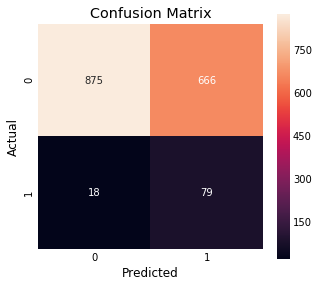

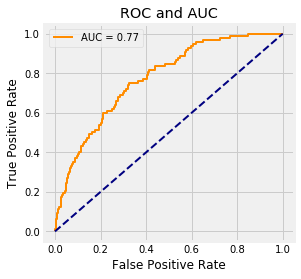

AUC score: 0.772
Recall score: 0.814


(None, None, None)

In [69]:
print(f'Model Hyperparameters: {(gs_logistic.best_params_)}') 
print(f'ROC-AUC Score Validation: {(gs_logistic.best_score_ ):.3}')

# EVALUATE ON THE TRAIN SET
ConfusionMatrix(gs_logistic, X_train, y_train)
RocAuc(gs_logistic, X_train, y_train)

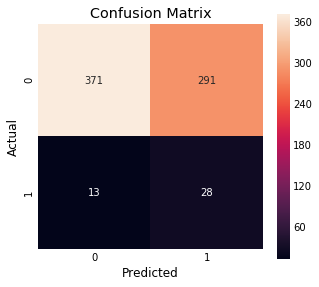

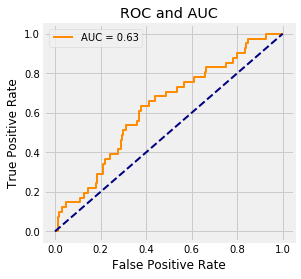

AUC score: 0.626
Recall score: 0.683


(None, None, None)

In [70]:
# EVALUATE ON THE TEST SET
ConfusionMatrix(gs_logistic, X_test, y_test)
RocAuc(gs_logistic, X_test, y_test)

#### Decision Tree Classifier

In [25]:
# AUTOMATIC HYPER-PARAMETER OPTIMIZATION WITH CROSS VALIDATION
model = Pipeline([
        ('oversampling', SMOTE(ratio=1, random_state=12)),
        ('classification', tree.DecisionTreeClassifier())])

skf = StratifiedKFold()

gs_dt = GridSearchCV(
    model,
    param_grid={'classification__criterion': ['gini', 'entropy'],
                'classification__max_depth': np.arange(1, 50, 5),
                'classification__min_samples_leaf': np.arange(1, 16)},
    scoring='recall', 
    n_jobs=-1, 
    cv=skf
)

gs_dt.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('oversampling', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=12, ratio=1,
   sampling_strategy='auto', svm_estimator='deprecated')), ('classification', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'classification__criterion': ['gini', 'entropy'], 'classification__max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46]), 'classification__min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

Model Hyperparameters: {'classification__criterion': 'gini', 'classification__max_depth': 1, 'classification__min_samples_leaf': 1}
ROC-AUC Score Validation: 0.639


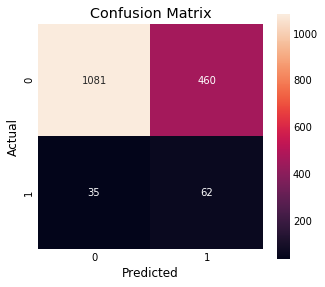

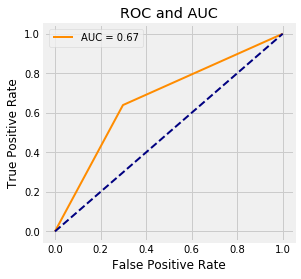

AUC score: 0.67
Recall score: 0.639


(None, None, None)

In [26]:
print(f'Model Hyperparameters: {(gs_dt.best_params_)}') 
print(f'ROC-AUC Score Validation: {(gs_dt.best_score_ ):.3}')

# EVALUATE ON THE TRAIN SET
ConfusionMatrix(gs_dt, X_train, y_train)
RocAuc(gs_dt, X_train, y_train)

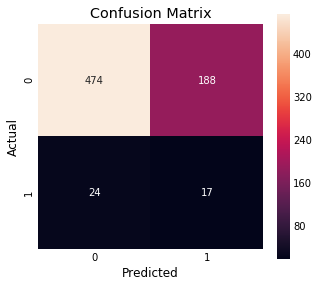

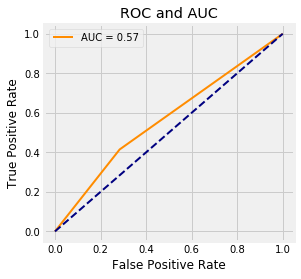

AUC score: 0.565
Recall score: 0.415


(None, None, None)

In [27]:
# EVALUATE ON THE TEST SET
ConfusionMatrix(gs_dt, X_test, y_test)
RocAuc(gs_dt, X_test, y_test)

#### Random Forest

In [28]:
# AUTOMATIC HYPER-PARAMETER OPTIMIZATION WITH CROSS VALIDATION
model = Pipeline([
        ('oversampling', SMOTE(ratio=1, random_state=12)),
        ('classification', RandomForestClassifier())])

skf = StratifiedKFold()

gs_randomforest = GridSearchCV(
    model,
    param_grid={'classification__criterion': ['gini', 'entropy'],
                'classification__max_depth': np.arange(1, 50, 5),
                'classification__min_samples_leaf': np.arange(1, 16)},
    scoring='recall', 
    n_jobs=-1, 
    cv=skf
)

gs_randomforest.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('oversampling', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=12, ratio=1,
   sampling_strategy='auto', svm_estimator='deprecated')), ('classification', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='g...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'classification__criterion': ['gini', 'entropy'], 'classification__max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46]), 'classification__min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

Model Hyperparameters: {'classification__criterion': 'entropy', 'classification__max_depth': 1, 'classification__min_samples_leaf': 11}
ROC-AUC Score Validation: 0.588


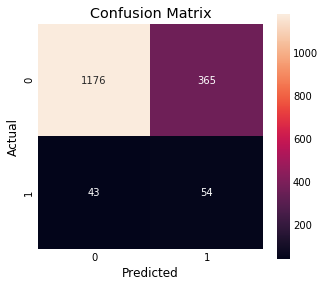

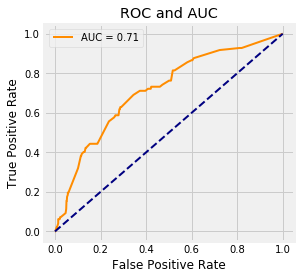

AUC score: 0.712
Recall score: 0.557


(None, None, None)

In [29]:
print(f'Model Hyperparameters: {(gs_randomforest.best_params_)}') 
print(f'ROC-AUC Score Validation: {(gs_randomforest.best_score_ ):.3}')

# EVLUATE ON THE TRAIN SET
ConfusionMatrix(gs_randomforest, X_train, y_train)
RocAuc(gs_randomforest, X_train, y_train)

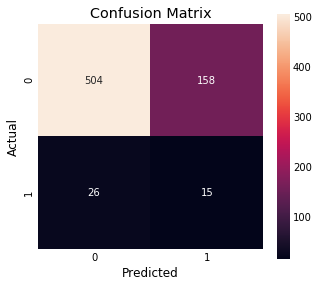

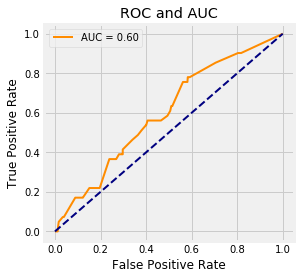

AUC score: 0.598
Recall score: 0.366


(None, None, None)

In [30]:
# EVLUATE ON THE TEST SET
ConfusionMatrix(gs_randomforest, X_test, y_test)
RocAuc(gs_randomforest, X_test, y_test)

#### Gradient Boosted Decision Trees

In [31]:
# AUTOMATIC HYPER-PARAMETER OPTIMIZATION WITH CROSS VALIDATION
model = Pipeline([
        ('oversampling', SMOTE(ratio=1, random_state=12)),
        ('classification', GradientBoostingClassifier())])

skf = StratifiedKFold()

gs_gb = GridSearchCV(
    model,
    param_grid={'classification__learning_rate': [0.01, 0.1, 0.2, 0.4, 1.0],
                'classification__max_depth': np.arange(1, 5)},
    scoring='recall',
    n_jobs=-1, 
    cv=skf
)

gs_gb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('oversampling', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=12, ratio=1,
   sampling_strategy='auto', svm_estimator='deprecated')), ('classification', GradientBoostingClassifier(criterion='friedman_mse', init=None,
      ...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'classification__learning_rate': [0.01, 0.1, 0.2, 0.4, 1.0], 'classification__max_depth': array([1, 2, 3, 4])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

Model Hyperparameters: {'classification__learning_rate': 0.01, 'classification__max_depth': 1}
Recall Score Validation: 0.639


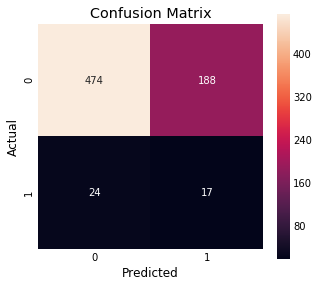

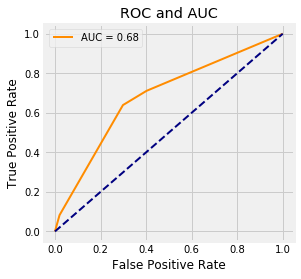

AUC score: 0.683
Recall score: 0.639


(None, None, None)

In [32]:
print(f'Model Hyperparameters: {(gs_gb.best_params_)}') 
print(f'Recall Score Validation: {(gs_gb.best_score_ ):.3}')

# EVLUATE ON THE TRAIN SET
ConfusionMatrix(gs_gb, X_test, y_test)
RocAuc(gs_gb, X_train, y_train)

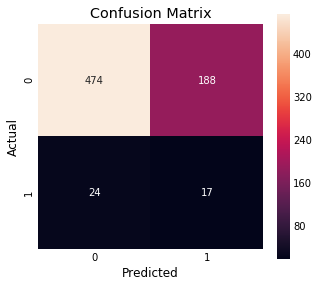

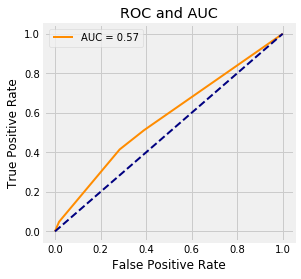

AUC score: 0.572
Recall score: 0.415


(None, None, None)

In [33]:
# EVLUATE ON THE TEST SET
ConfusionMatrix(gs_gb, X_test, y_test)
RocAuc(gs_gb, X_test, y_test)

#### Summary

In [34]:
models = [gs_logistic, gs_dt, gs_randomforest, gs_gb]

roc_auc_scores_test = []
recall_scores_test = []
roc_auc_scores_train = []
recall_scores_train = []


for model in models:
    probs = model.predict_proba(X_test)
    y_hat = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, probs[:, 1])
    roc_aucs = auc(fpr, tpr)
    roc_auc_scores_test.append(roc_aucs)
    recalls = recall_score(y_test, y_hat)
    recall_scores_test.append(recalls)
    
    probs = model.predict_proba(X_train)
    y_hat = model.predict(X_train)
    fpr, tpr, _ = roc_curve(y_train, probs[:, 1])
    roc_aucs = auc(fpr, tpr)
    roc_auc_scores_train.append(roc_aucs)
    recalls = recall_score(y_train, y_hat)
    recall_scores_train.append(recalls)

scores  = list(zip(roc_auc_scores_train, recall_scores_train, roc_auc_scores_test, recall_scores_test))
evaluation_demog = pd.DataFrame(scores, columns=['ROC-AUC-Train','Recall-Train', 'ROC-AUC-Test', 'Recall-Test'])
evaluation_demog.index = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'GBoosted Decision Trees']

display(evaluation_demog)

,ROC-AUC-Train,Recall-Train,ROC-AUC-Test,Recall-Test
Logistic Regression,0.776614,0.783505,0.637167,0.585366
Decision Tree,0.670334,0.639175,0.565323,0.414634
Random Forest,0.711969,0.556701,0.598316,0.365854
GBoosted Decision Trees,0.682794,0.639175,0.572029,0.414634


### 4.2. Attitudinal Features

In [75]:
# SPLIT OUT A TRAIN AND TEST SET
X_train, X_test, y_train, y_test  = train_test_split(X_attitudes, y, train_size = 0.7, stratify=y)

# CHANGE Y TO A 1-D ARRAY
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

# SCALE THE DATA 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# GET INFO
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1638, 89)
(1638,)
(703, 89)
(703,)


#### Logistic Regression

In [76]:
# AUTOMATIC HYPER-PARAMETER OPTIMIZATION WITH CROSS VALIDATION
model = Pipeline([
        ('oversampling', SMOTE(ratio=1)),
        ('classification', sk.linear_model.LogisticRegression(penalty='l2'))])

skf = StratifiedKFold()

gs_logistic = GridSearchCV(
    model,
    param_grid={'classification__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
               'classification__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    scoring='recall', 
    n_jobs=-1, 
    cv=skf
)

gs_logistic.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('oversampling', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=None, ratio=1,
   sampling_strategy='auto', svm_estimator='deprecated')), ('classification', LogisticRegression(C=1.0, class...enalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'classification__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000], 'classification__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

Model Hyperparameters: {'classification__C': 0.0001, 'classification__solver': 'liblinear'}
Recall Score Validation: 0.918


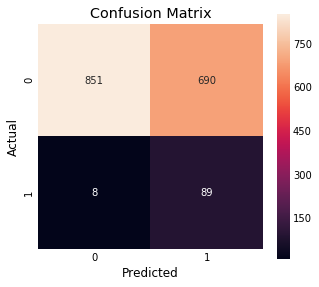

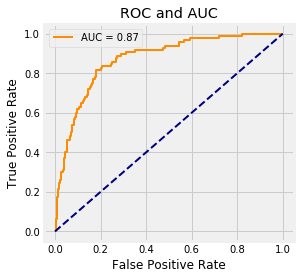

AUC score: 0.871
Recall score: 0.918


(None, None, None)

In [77]:
print(f'Model Hyperparameters: {(gs_logistic.best_params_)}') 
print(f'Recall Score Validation: {(gs_logistic.best_score_ ):.3}')

# EVLUATE ON THE TRAIN SET
ConfusionMatrix(gs_logistic, X_train, y_train)
RocAuc(gs_logistic, X_train, y_train)

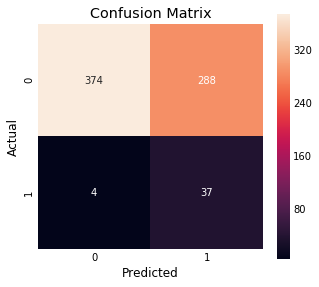

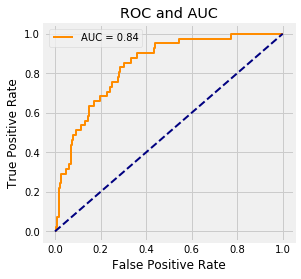

AUC score: 0.837
Recall score: 0.902


(None, None, None)

In [78]:
# EVLUATE ON THE TEST SET
ConfusionMatrix(gs_logistic, X_test, y_test)
RocAuc(gs_logistic, X_test, y_test)

#### Decision Tree Classifier

In [39]:
# AUTOMATIC HYPER-PARAMETER OPTIMIZATION WITH CROSS VALIDATION 
model = Pipeline([
        ('oversampling', SMOTE(ratio=1, random_state=12)),
        ('classification', tree.DecisionTreeClassifier())])

skf = StratifiedKFold()

gs_dt = GridSearchCV(
    model,
    param_grid={'classification__criterion': ['gini', 'entropy'],
                'classification__max_depth': np.arange(1, 80, 5),
                'classification__min_samples_leaf': np.arange(1, 16)},
    scoring='recall', 
    n_jobs=-1, 
    cv=skf
)

gs_dt.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('oversampling', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=12, ratio=1,
   sampling_strategy='auto', svm_estimator='deprecated')), ('classification', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'classification__criterion': ['gini', 'entropy'], 'classification__max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76]), 'classification__min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

Model Hyperparameters: {'classification__criterion': 'gini', 'classification__max_depth': 1, 'classification__min_samples_leaf': 1}
Recall Score Validation: 0.804


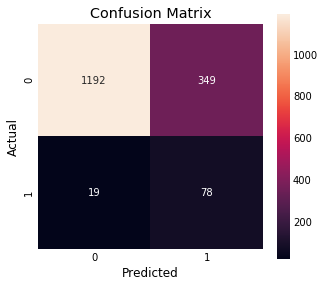

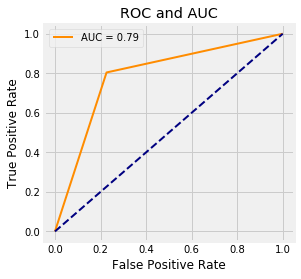

AUC score: 0.789
Recall score: 0.804


(None, None, None)

In [40]:
print(f'Model Hyperparameters: {(gs_dt.best_params_)}') 
print(f'Recall Score Validation: {(gs_dt.best_score_ ):.3}')

# EVLUATE ON THE TRAIN SET
ConfusionMatrix(gs_dt, X_train, y_train)
RocAuc(gs_dt, X_train, y_train)

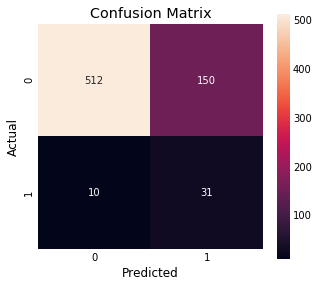

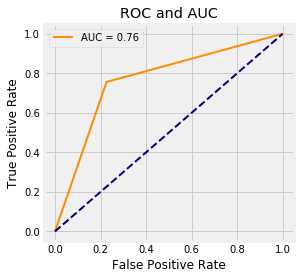

AUC score: 0.765
Recall score: 0.756


(None, None, None)

In [41]:
# EVLUATE ON THE TEST SET
ConfusionMatrix(gs_dt, X_test, y_test)
RocAuc(gs_dt, X_test, y_test)

#### Random Forest

In [42]:
# AUTOMATIC HYPER-PARAMETER OPTIMIZATION WITH CROSS VALIDATION 
model = Pipeline([
        ('oversampling', SMOTE(ratio=1, random_state=12)),
        ('classification', RandomForestClassifier())])

skf = StratifiedKFold()

gs_randomforest = GridSearchCV(
    model,
    param_grid={'classification__criterion': ['gini', 'entropy'],
                'classification__max_depth': np.arange(1, 80, 10),
                'classification__min_samples_leaf': np.arange(1, 16)},
    scoring='recall', 
    n_jobs=-1, 
    cv=skf
)

gs_randomforest.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('oversampling', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=12, ratio=1,
   sampling_strategy='auto', svm_estimator='deprecated')), ('classification', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='g...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'classification__criterion': ['gini', 'entropy'], 'classification__max_depth': array([ 1, 11, 21, 31, 41, 51, 61, 71]), 'classification__min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

Model Hyperparameters: {'classification__criterion': 'gini', 'classification__max_depth': 1, 'classification__min_samples_leaf': 1}
Recall Score Validation: 0.752


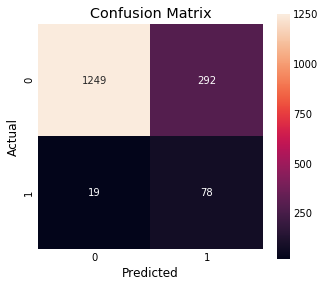

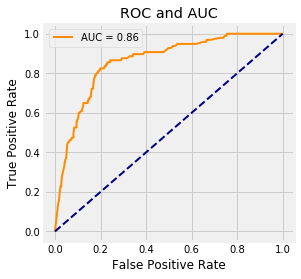

AUC score: 0.859
Recall score: 0.804


(None, None, None)

In [43]:
print(f'Model Hyperparameters: {(gs_randomforest.best_params_)}') 
print(f'Recall Score Validation: {(gs_randomforest.best_score_ ):.3}')

# EVLUATE ON THE TRAIN SET
ConfusionMatrix(gs_randomforest, X_train, y_train)
RocAuc(gs_randomforest, X_train, y_train)

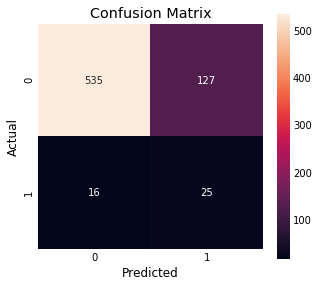

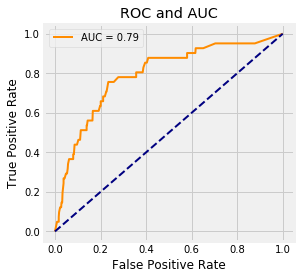

AUC score: 0.792
Recall score: 0.61


(None, None, None)

In [44]:
# EVLUATE ON THE TEST SET
ConfusionMatrix(gs_randomforest, X_test, y_test)
RocAuc(gs_randomforest, X_test, y_test)

### Gradient Boosted Decision Trees

In [45]:
# AUTOMATIC HYPER-PARAMETER OPTIMIZATION WITH CROSS VALIDATION
model = Pipeline([
        ('oversampling', SMOTE(ratio=1, random_state=12)),
        ('classification', GradientBoostingClassifier())])

skf = StratifiedKFold()

gs_gb = GridSearchCV(
    model,
    param_grid={'classification__learning_rate': [0.01, 0.1, 0.2, 0.4, 1.0],
                'classification__max_depth': np.arange(1, 5)},
    scoring='recall',
    n_jobs=-1, 
    cv=skf
)

gs_gb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('oversampling', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=12, ratio=1,
   sampling_strategy='auto', svm_estimator='deprecated')), ('classification', GradientBoostingClassifier(criterion='friedman_mse', init=None,
      ...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'classification__learning_rate': [0.01, 0.1, 0.2, 0.4, 1.0], 'classification__max_depth': array([1, 2, 3, 4])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

Model Hyperparameters: {'classification__learning_rate': 0.01, 'classification__max_depth': 1}
ROC-AUC Score Validation: 0.712


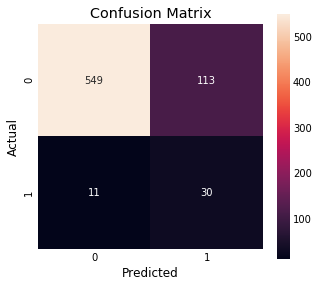

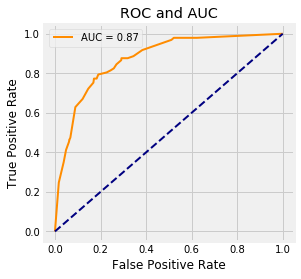

AUC score: 0.872
Recall score: 0.794


(None, None, None)

In [46]:
print(f'Model Hyperparameters: {(gs_gb.best_params_)}') 
print(f'ROC-AUC Score Validation: {(gs_gb.best_score_ ):.3}')

# EVLUATE ON THE TRAIN SET
ConfusionMatrix(gs_gb, X_test, y_test)
RocAuc(gs_gb, X_train, y_train)

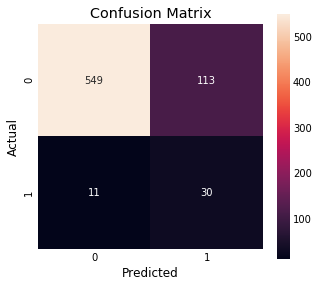

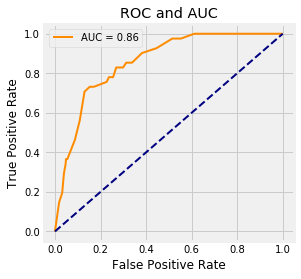

AUC score: 0.857
Recall score: 0.732


(None, None, None)

In [47]:
# EVLUATE ON THE TEST SET
ConfusionMatrix(gs_gb, X_test, y_test)
RocAuc(gs_gb, X_test, y_test)

#### Summary

In [48]:
models = [gs_logistic, gs_dt, gs_randomforest, gs_gb]

roc_auc_scores_test = []
recall_scores_test = []
roc_auc_scores_train = []
recall_scores_train = []


for model in models:
    probs = model.predict_proba(X_test)
    y_hat = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, probs[:, 1])
    roc_aucs = auc(fpr, tpr)
    roc_auc_scores_test.append(roc_aucs)
    recalls = recall_score(y_test, y_hat)
    recall_scores_test.append(recalls)
    
    probs = model.predict_proba(X_train)
    y_hat = model.predict(X_train)
    fpr, tpr, _ = roc_curve(y_train, probs[:, 1])
    roc_aucs = auc(fpr, tpr)
    roc_auc_scores_train.append(roc_aucs)
    recalls = recall_score(y_train, y_hat)
    recall_scores_train.append(recalls)

scores  = list(zip(roc_auc_scores_train, recall_scores_train, roc_auc_scores_test, recall_scores_test))
evaluation_attitudes = pd.DataFrame(scores, columns=['ROC-AUC-Train','Recall-Train', 'ROC-AUC-Test', 'Recall-Test'])
evaluation_attitudes.index = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'GBoosted Decision Trees']

display(evaluation_attitudes)

,ROC-AUC-Train,Recall-Train,ROC-AUC-Test,Recall-Test
Logistic Regression,0.870228,0.927835,0.837226,0.902439
Decision Tree,0.788824,0.804124,0.764756,0.756098
Random Forest,0.859463,0.804124,0.792259,0.609756
GBoosted Decision Trees,0.871990,0.793814,0.857269,0.731707


### 4.3. Demographics and Attitudinal Features

In [49]:
# SPLIT OUT A TRAIN AND TEST SET
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size = 0.7, random_state=12, stratify=y)

# CHANGE Y TO A 1-D ARRAY
y_train,y_test = np.ravel(y_train), np.ravel(y_test)

# SCALE THE DATA
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# GET INFO
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1638, 164)
(1638,)
(703, 164)
(703,)


#### Logistic Regression

In [50]:
# AUTOMATIC HYPER-PARAMETER OPTIMIZATION WITH CROSS VALIDATION
model = Pipeline([
        ('oversampling', SMOTE(ratio=1, random_state=12)),
        ('classification', sk.linear_model.LogisticRegression(penalty='l2'))])

skf = StratifiedKFold()

gs_logistic = GridSearchCV(
    model,
    param_grid={'classification__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
               'classification__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    scoring='recall', 
    n_jobs=-1, 
    cv=skf
)

gs_logistic.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('oversampling', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=12, ratio=1,
   sampling_strategy='auto', svm_estimator='deprecated')), ('classification', LogisticRegression(C=1.0, class_w...enalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'classification__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000], 'classification__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

Model Hyperparameters: {'classification__C': 0.0001, 'classification__solver': 'liblinear'}
ROC-AUC Score Validation: 0.938


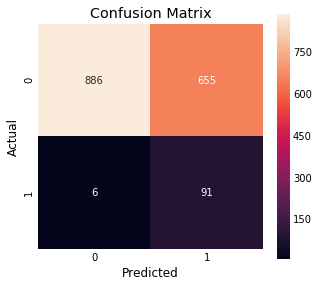

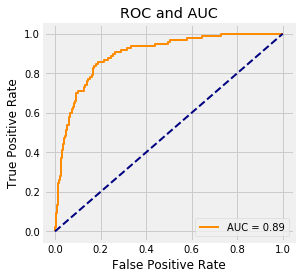

AUC score: 0.895
Recall score: 0.938


(None, None, None)

In [51]:
print(f'Model Hyperparameters: {(gs_logistic.best_params_)}') 
print(f'ROC-AUC Score Validation: {(gs_logistic.best_score_ ):.3}')

# EVLUATE ON THE TRAIN SET
ConfusionMatrix(gs_logistic, X_train, y_train)
RocAuc(gs_logistic, X_train, y_train)

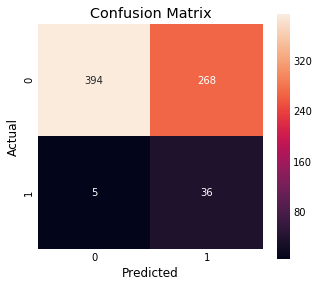

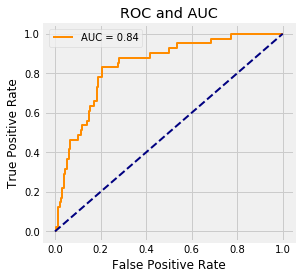

AUC score: 0.839
Recall score: 0.878


(None, None, None)

In [52]:
# EVLUATE ON THE TEST SET
ConfusionMatrix(gs_logistic, X_test, y_test)
RocAuc(gs_logistic, X_test, y_test)

#### Decision Tree Classifier

In [53]:
# AUTOMATIC HYPER-PARAMETER OPTIMIZATION WITH CROSS VALIDATION 
model = Pipeline([
        ('oversampling', SMOTE(ratio=1, random_state=12)),
        ('classification', tree.DecisionTreeClassifier())])

skf = StratifiedKFold()

gs_dt = GridSearchCV(
    model,
    param_grid={'classification__criterion': ['gini', 'entropy'], 
                'classification__max_depth': np.arange(1, 120, 5),
                'classification__min_samples_leaf': np.arange(1, 16)},
    scoring='recall', 
    n_jobs=-1, 
    cv=skf
)

gs_dt.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('oversampling', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=12, ratio=1,
   sampling_strategy='auto', svm_estimator='deprecated')), ('classification', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'classification__criterion': ['gini', 'entropy'], 'classification__max_depth': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116]), 'classification__min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
       pre_dispatch='2*n_jobs', refit=True, 

Model Hyperparameters: {'classification__criterion': 'gini', 'classification__max_depth': 1, 'classification__min_samples_leaf': 1}
Recall Score Validation: 0.692


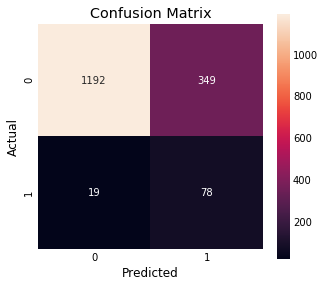

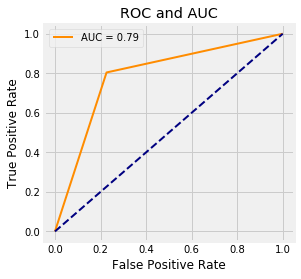

AUC score: 0.789
Recall score: 0.804


(None, None, None)

In [54]:
print(f'Model Hyperparameters: {(gs_dt.best_params_)}') 
print(f'Recall Score Validation: {(gs_dt.best_score_ ):.3}')

# EVLUATE ON THE TRAIN SET
ConfusionMatrix(gs_dt, X_train, y_train)
RocAuc(gs_dt, X_train, y_train)

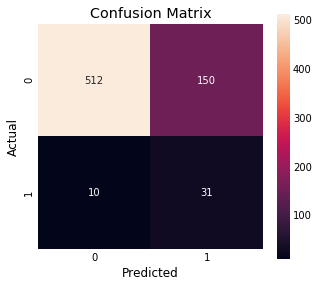

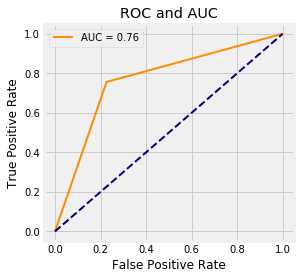

AUC score: 0.765
Recall score: 0.756


(None, None, None)

In [55]:
# EVLUATE ON THE TEST SET
ConfusionMatrix(gs_dt, X_test, y_test)
RocAuc(gs_dt, X_test, y_test)

#### Random Forest

In [56]:
# AUTOMATIC HYPER-PARAMETER OPTIMIZATION WITH CROSS VALIDATION 
model = Pipeline([
        ('oversampling', SMOTE(ratio=1, random_state=12)),
        ('classification', RandomForestClassifier())])

skf = StratifiedKFold()

gs_randomforest = GridSearchCV(
    model,
    param_grid={'classification__criterion': ['gini', 'entropy'],
                'classification__max_depth': np.arange(1, 120, 5),
                'classification__min_samples_leaf': np.arange(1, 16)},
    scoring='recall', 
    n_jobs=-1, 
    cv=skf
)

gs_randomforest.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('oversampling', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=12, ratio=1,
   sampling_strategy='auto', svm_estimator='deprecated')), ('classification', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='g...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'classification__criterion': ['gini', 'entropy'], 'classification__max_depth': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116]), 'classification__min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
       pre_dispatch='2*n_jobs', refit=True, 

Model Hyperparameters: {'classification__criterion': 'gini', 'classification__max_depth': 1, 'classification__min_samples_leaf': 15}
Recall Score Validation: 0.731


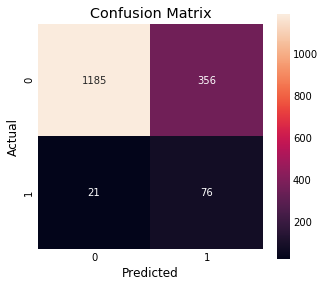

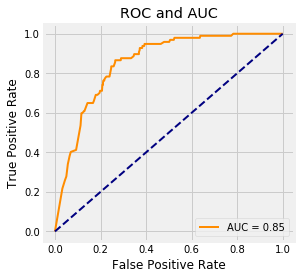

AUC score: 0.853
Recall score: 0.784


(None, None, None)

In [57]:
print(f'Model Hyperparameters: {(gs_randomforest.best_params_)}') 
print(f'Recall Score Validation: {(gs_randomforest.best_score_ ):.3}')

# EVLUATE ON THE TRAIN SET
ConfusionMatrix(gs_randomforest, X_train, y_train)
RocAuc(gs_randomforest, X_train, y_train)

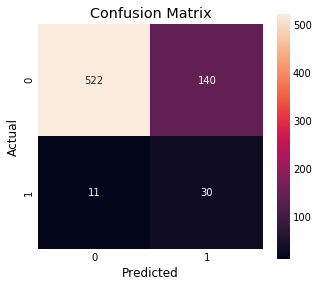

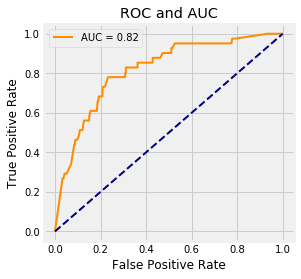

AUC score: 0.817
Recall score: 0.732


(None, None, None)

In [58]:
# EVLUATE ON THE TEST SET
ConfusionMatrix(gs_randomforest, X_test, y_test)
RocAuc(gs_randomforest, X_test, y_test)

#### Gradient Boosted Decision Trees

In [59]:
# AUTOMATIC HYPER-PARAMETER OPTIMIZATION WITH CROSS VALIDATION
model = Pipeline([
        ('oversampling', SMOTE(ratio=1, random_state=12)),
        ('classification', GradientBoostingClassifier())])

skf = StratifiedKFold()

gs_gb = GridSearchCV(
    model,
    param_grid={'classification__learning_rate': [0.01, 0.1, 0.2, 0.4, 1.0],
                'classification__max_depth': np.arange(1, 5)},
    scoring='recall',
    n_jobs=-1, 
    cv=skf
)

gs_gb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('oversampling', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=12, ratio=1,
   sampling_strategy='auto', svm_estimator='deprecated')), ('classification', GradientBoostingClassifier(criterion='friedman_mse', init=None,
      ...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'classification__learning_rate': [0.01, 0.1, 0.2, 0.4, 1.0], 'classification__max_depth': array([1, 2, 3, 4])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

Model Hyperparameters: {'classification__learning_rate': 0.01, 'classification__max_depth': 1}
Recall Score Validation: 0.691


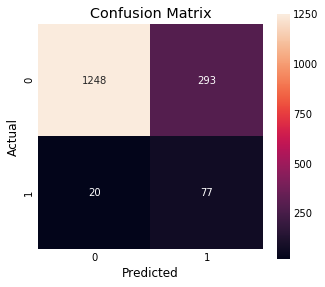

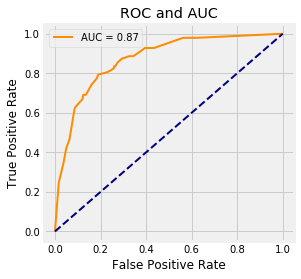

AUC score: 0.871
Recall score: 0.794


(None, None, None)

In [60]:
print(f'Model Hyperparameters: {(gs_gb.best_params_)}') 
print(f'Recall Score Validation: {(gs_gb.best_score_ ):.3}')

# EVLUATE ON THE TRAIN SET
ConfusionMatrix(gs_gb, X_train, y_train)
RocAuc(gs_gb, X_train, y_train)

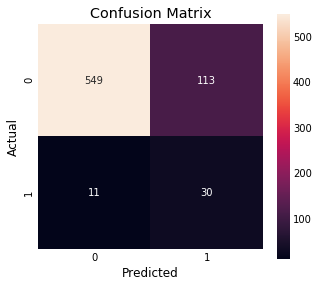

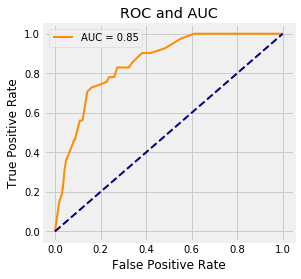

AUC score: 0.852
Recall score: 0.732


(None, None, None)

In [61]:
# EVLUATE ON THE TEST SET
ConfusionMatrix(gs_gb, X_test, y_test)
RocAuc(gs_gb, X_test, y_test)

#### Summary

In [62]:
models = [gs_logistic, gs_dt, gs_randomforest, gs_gb]

roc_auc_scores_test = []
recall_scores_test = []
roc_auc_scores_train = []
recall_scores_train = []


for model in models:
    probs = model.predict_proba(X_test)
    y_hat = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, probs[:, 1])
    roc_aucs = auc(fpr, tpr)
    roc_auc_scores_test.append(roc_aucs)
    recalls = recall_score(y_test, y_hat)
    recall_scores_test.append(recalls)
    
    probs = model.predict_proba(X_train)
    y_hat = model.predict(X_train)
    fpr, tpr, _ = roc_curve(y_train, probs[:, 1])
    roc_aucs = auc(fpr, tpr)
    roc_auc_scores_train.append(roc_aucs)
    recalls = recall_score(y_train, y_hat)
    recall_scores_train.append(recalls)

scores  = list(zip(roc_auc_scores_train, recall_scores_train, roc_auc_scores_test, recall_scores_test))
evaluation_full = pd.DataFrame(scores, columns=['ROC-AUC-Train','Recall-Train', 'ROC-AUC-Test', 'Recall-Test'])
evaluation_full.index = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'GBoosted Decision Trees']

display(evaluation_full)

,ROC-AUC-Train,Recall-Train,ROC-AUC-Test,Recall-Test
Logistic Regression,0.894786,0.938144,0.838553,0.878049
Decision Tree,0.788824,0.804124,0.764756,0.756098
Random Forest,0.852673,0.783505,0.817405,0.731707
GBoosted Decision Trees,0.871228,0.793814,0.851816,0.731707


## 5. Model Evaluation

In [63]:
print('Demographics Models:')
display(evaluation_demog)

print('Attitudes Models:')
display(evaluation_attitudes)

print('Demographics and Attitudes Models:')
display(evaluation_full)

Demographics Models:


,ROC-AUC-Train,Recall-Train,ROC-AUC-Test,Recall-Test
Logistic Regression,0.776614,0.783505,0.637167,0.585366
Decision Tree,0.670334,0.639175,0.565323,0.414634
Random Forest,0.711969,0.556701,0.598316,0.365854
GBoosted Decision Trees,0.682794,0.639175,0.572029,0.414634


Attitudes Models:


,ROC-AUC-Train,Recall-Train,ROC-AUC-Test,Recall-Test
Logistic Regression,0.870228,0.927835,0.837226,0.902439
Decision Tree,0.788824,0.804124,0.764756,0.756098
Random Forest,0.859463,0.804124,0.792259,0.609756
GBoosted Decision Trees,0.871990,0.793814,0.857269,0.731707


Demographics and Attitudes Models:


,ROC-AUC-Train,Recall-Train,ROC-AUC-Test,Recall-Test
Logistic Regression,0.894786,0.938144,0.838553,0.878049
Decision Tree,0.788824,0.804124,0.764756,0.756098
Random Forest,0.852673,0.783505,0.817405,0.731707
GBoosted Decision Trees,0.871228,0.793814,0.851816,0.731707


The logistic regression results were superior to decision tree models on demographic data, attitudinal data and both data sets combined. The best model was trained on attitudinal features only and resulted in a ROC-AUC of 0.84 and a recall score of 0.9.  

### 5.1. Feature Importance
To assess feature importance, the coefficients of the best model, a logostic regression with attitudinal data, will be anlyzed. Because the attitudinal features are measured on the same scale of 1-4, they are directly comparable without normalization. For the sake of simplicity we will examine the features with the 20 largest absolute value coefficients. 

In [64]:
# SPLIT OUT A TEST SET
X_train, X_test, y_train, y_test  = train_test_split(X_attitudes, y, train_size = 0.7, random_state=12, stratify=y)

# CHANGE Y TO A 1-D ARRAY
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

# SCALE THE DATA
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# USE BEST MODEL WITH TUNED HYPER-PARAMETERS
best_model = sk.linear_model.LogisticRegression(penalty='l2', C=0.0001, solver='liblinear')
best_model.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

,Features,Coefficients,Abs_Coefficients
0,BOR13,Negative,0.0107
1,FIN4,Positive,0.0074
2,BOR1,Negative,0.0074
3,FIN3,Positive,0.0067
4,FIN14,Positive,0.0066
5,INV12,Negative,0.0060
6,BOR9,Negative,0.0057
7,BOR7,Negative,0.0049
8,FIN8,Negative,0.0049
9,FIN20,Negative,0.0048


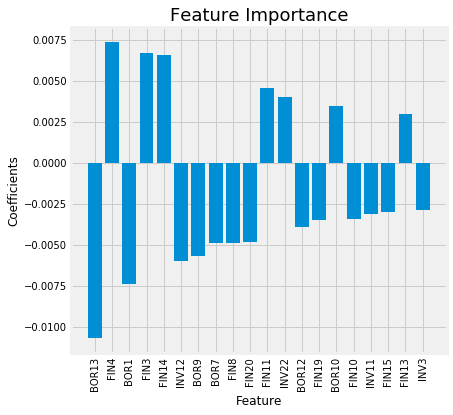

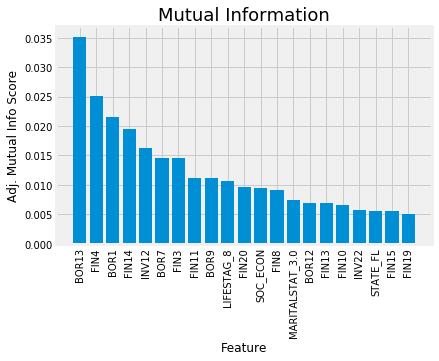

In [65]:
# RETRIEVE COEFFICIENTS
feature_coefs = best_model.coef_
importances = []
features = X_attitudes.columns

for coefficient in np.nditer(feature_coefs):
    importances.append(coefficient)

feature_importance = list(zip(features, importances))
feature_importance = pd.DataFrame(feature_importance, columns=['Features','Coefficients'])
feature_importance['Abs_Coefficients'] = feature_importance['Coefficients'].abs().apply(lambda x: round(x, 4))
feature_importance['Coefficients'] = np.where(feature_importance['Coefficients']<0, 'Negative', 'Positive')
feature_importance.sort_values(by=['Abs_Coefficients'], ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)

# DISPLAY 20 LARGEST ABSOLUTE VALUE OF COEFFICIENTS
display(feature_importance.head(21))

Coefficients = np.where(feature_importance['Coefficients']=='Negative', feature_importance.Abs_Coefficients*(-1),
                       feature_importance.Abs_Coefficients)


# PLOT GTAPH OF COEFFICIENTS
plt.figure(figsize=(6, 6))
plt.bar(feature_importance.Features.head(20), Coefficients[0:20])
plt.xlabel('Feature', size=12)
plt.ylabel('Coefficients', size=12)
plt.title('Feature Importance',size=18)
plt.xticks(rotation=90)
plt.show()

# COMPARE COEFFICIENTS WITH MUTUAL INFO SCORES
plt.figure()
plt.bar(mutual_info.Features.head(21), mutual_info['Adjusted Mutual Info Score'].head(21))
plt.xlabel('Feature', size=12)
plt.ylabel('Adj. Mutual Info Score', size=12)
plt.title('Mutual Information',size=18)
plt.xticks(rotation=90)
plt.show()

Of the attitudinal features with the highest mutual information scores, 17 are among the 20 largest coefficients. The remaining 3 are demograpihc features that were not included in the final model. This supports the face validity of our model, in that it has set it's parameters based on what is intuitively believed to be related to whether a household defaults on a mortgage payment.   

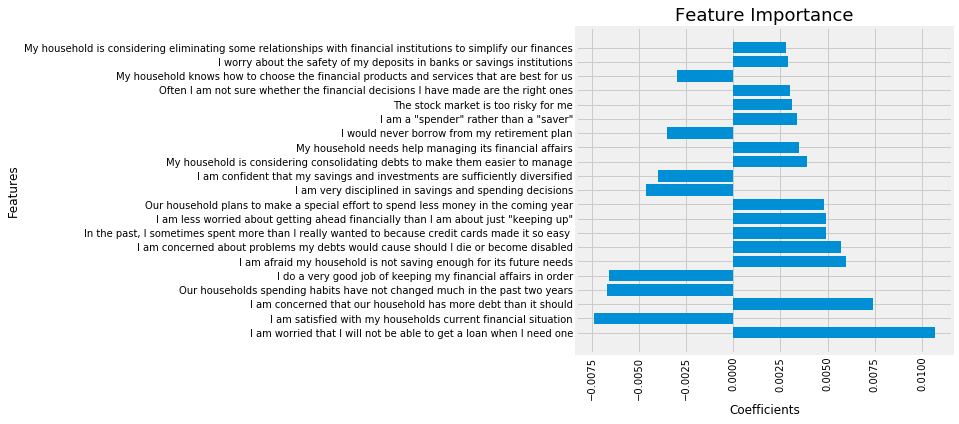

In [66]:
questions = ['I am worried that I will not be able to get a loan when I need one',
             'I am satisfied with my households current financial situation',
             'I am concerned that our household has more debt than it should', 
             'Our households spending habits have not changed much in the past two years',
             'I do a very good job of keeping my financial affairs in order',
             'I am afraid my household is not saving enough for its future needs',
             'I am concerned about problems my debts would cause should I die or become disabled',
             'In the past, I sometimes spent more than I really wanted to because credit cards made it so easy ',
             'I am less worried about getting ahead financially than I am about just "keeping up"',
             'Our household plans to make a special effort to spend less money in the coming year',
             'I am very disciplined in savings and spending decisions',
             'I am confident that my savings and investments are sufficiently diversified',
             'My household is considering consolidating debts to make them easier to manage',
             'My household needs help managing its financial affairs',
             'I would never borrow from my retirement plan',
             'I am a "spender" rather than a "saver"',
             'The stock market is too risky for me',
             'Often I am not sure whether the financial decisions I have made are the right ones',
             'My household knows how to choose the financial products and services that are best for us',
             'I worry about the safety of my deposits in banks or savings institutions',
             'My household is considering eliminating some relationships with financial institutions to simplify our finances']

Coefficients = np.where(feature_importance['Coefficients']=='Positive', feature_importance.Abs_Coefficients*(-1),
                       feature_importance.Abs_Coefficients)
Coefficients = Coefficients[0:21]

plt.figure(figsize=(6, 6))
plt.barh(questions, Coefficients)
plt.xlabel('Coefficients', size=12)
plt.ylabel('Features', size=12)
plt.title('Feature Importance',size=18)
plt.xticks(rotation=90)
plt.show()


## 6. Discussion and Future Research

- Generalizability: given the small sample size considered for this analysis, it would be worth assessing whether the results generalize to outside data, or possiblity replicate the analysis on a larger sample of US households with mortgages. A larger sample size would also lend itself to more sophisticated machine learning models such as neural networks. 
- Benchmark: the hypothesis tested in this analysis is whether attitudes can predict creditworthiness, defined as whether a mortgage loan borrower will default on a mortgage payment. The premise underlying this hypothesis is that such alternative methods of credit assessment can be used inplace of, or in combination with, conventional methods of credit assessment for loan applications involving un-scorable customers. To further our analysis, it would be interesting to compare our results against a benchmark of conventional methods of credit assessment, i.e. credit scores. This would allow us to evaluate the incremental predictive power of alternative methods. 